In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from scipy import integrate as integrate
import sympy as sp
x, w, z = sp.symbols('x, w, z')

In [2]:
swift_data = pd.read_csv('swift_data.csv', sep='\t')
z_min = swift_data['z'].min()

In [3]:
def z_min_z(z_min):
    """
    zmin(z) is obtained on solving tage(z) − tage(zmin) = τmin
    """
    return (cosmo.age(0) - cosmo.age(z_min)).value

In [4]:
# this generates a list from of (z+1) from 0<z<10, or 1<Z<11
Z_lst = np.linspace(1, 11, 10)

In [41]:
t = (1/(w*sp.sqrt(0.3*(w)**3 + 0.7)))
f = sp.integrate(t)
f # we will use this j in our later calculations

-0.796819072889596*asinh(1.52752523165195/w**(3/2))

In [29]:
def result_rep(n):
    int_lst = []
    func = lambda x : (((x**2.7)/(1+(x/2.9)**(5.6)))*(1/(x*(0.3*(x)**3 + 0.7)**0.5)))*((-0.7968*np.arcsinh(1.5275/(Z**1.5))-(-0.7968)*np.arcsinh(1.5275/(x**1.5)))**-n)
    
    for Z in Z_lst:
        a, b = integrate.quad(func, z_min_z(Z), np.inf)
        int_lst.append(abs(a))
    plt.figure(figsize=(10,7)) #sets figure size
    plt.grid(b=True, which='major', alpha=0.8, linestyle='-', linewidth=2)
    plt.grid(b=True, which='minor', alpha=0.3, linestyle='dotted', linewidth=2)

    plt.plot(np.log(Z_lst), -np.log(int_lst))
    plt.xlabel('log(Z)')
    plt.ylabel('log(ψ)')
    plt.show

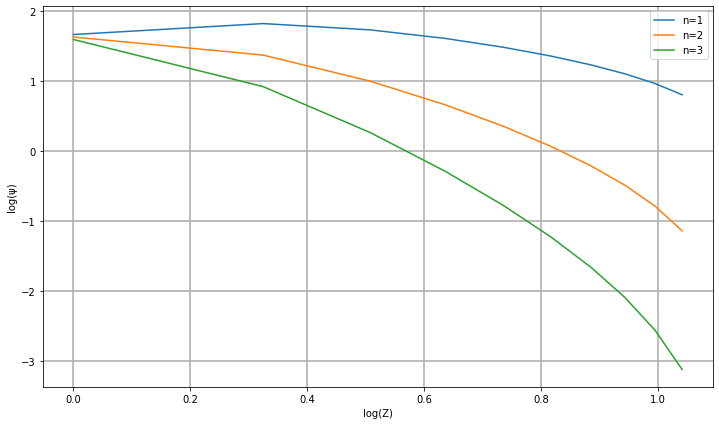

In [42]:
plt.figure(figsize=(12,7)) #sets figure size
plt.grid(b=True, which='major', alpha=0.8, linestyle='-', linewidth=2)
plt.grid(b=True, which='minor', alpha=0.3, linestyle='dotted', linewidth=2)
plt.xlabel('log(Z)')
plt.ylabel('log(ψ)')
for n in range(1, 4):
    int_lst = []
    func = lambda x : (((x**2.7)/(1+(x/2.9)**(5.6)))*(1/(x*(0.3*(x)**3 + 0.7)**0.5)))*((-0.7968*np.arcsinh(1.5275/(Z**1.5))-(-0.7968)*np.arcsinh(1.5275/(x**1.5)))**-n)
    for Z in Z_lst:
        a, b = integrate.quad(func, z_min_z(Z), np.inf)
        int_lst.append(abs(a))
    plt.plot(np.log10(Z_lst), -np.log10(int_lst))
    plt.show
plt.legend(['n=1', 'n=2', 'n=3'])   
